In [99]:
import pandas as pd
import numpy as np

In [100]:
# List of Drug ID - Side effect pairs
df_SE = pd.read_csv('meddra_all_se.PT.Drug-SE.tsv', sep='\t', header=None)
df_SE.columns = ['DrugID', 'SE']

# List of Drug ID - Drug Name pairs
df_DN = pd.read_csv('drug_names.tsv', sep='\t', header=None)
df_DN_ind0 = df_DN.set_index(0)

# Dictionary for replacing the Drug IDs with Drug Names
dict_DN = df_DN_ind0[1].to_dict()

In [101]:
# List of Drug Name - Side effect pairs
df_SE_DrugNames = pd.concat([df_SE['DrugID'].map(dict_DN), df_SE['SE']], axis=1)
df_SE_DrugNames.columns = ['Drug', 'SE']

In [102]:
# "one hot encoding" of the Drug Name - Side effects (binary matrix)
binMat_SE = pd.get_dummies(df_SE_DrugNames, columns=['SE'])
# group by drug
binMat_SE_sum = binMat_SE.groupby(['Drug']).sum()

#binMat_SE.columns = binMat_SE.iloc[0]
#binMat_SE = binMat_SE.drop(binMat_SE.index[0])

# remove > 1 entries
binMat_SE_sum[binMat_SE_sum > 1] = 1

In [104]:
binMat_SE_sum

SE_5'nucleotidase increased  \
Drug                                                                     
1,25(OH)2D3                                                          0   
17-hydroxyprogesterone                                               0   
18F-FDG                                                              0   
18F-flutemetamol                                                     0   
2-hydroxysuccinaldehyde                                              0   
4-AP                                                                 0   
4-PBA                                                                0   
4-methylpyrazole                                                     0   
5-ASA                                                                0   
5-FU                                                                 0   
5-aminolevulinic                                                     0   
5-aza-2'-deoxycytidine                                               0   
5-azacytidine                                                        0   
5-fluorocytosine                                                     0   
5-methyltetrahydrofolate                                             0   
6-mercaptopurine                                                     0   
6-thioguanine                                                        0   
68Ga                                                                 0   
8-MOP                                                                0   
A77                                                                  0   
AC1O3HA7                                                             0   
ACTH(1-39                                                            0   
ALX                                                                  0   
AMD3100                                                              0   
AN2690                                                               0   
APAs                                                                 0   
Abarelix                                                             0   
Almeta                                                               0   
Anidulafungin                                                        0   
Asp-Tyr(SO3H)-Met-Gly-Trp-Met-Asp-Phe-NH2                            0   
...                                                                ...   
vilazodone                                                           0   
vildagliptin                                                         0   
vinblastine                                                          0   
vincristine                                                          0   
vinflunine                                                           0   
vinorelbine                                                          0   
vismodegib                                                           0   
vitamin                                                              0   
vorapaxar                                                            0   
voriconazole                                                         0   
vorinostat                                                           0   
warfarin                                                             0   
x                                                                    0   
yttrium                                                              0   
zafirlukast                                                          0   
zalcitabine                                                          0   
zaleplon                                                             0   
zanamivir                                                            0   
ziconotide                                                           0   
zidovudine                                                           0   
zidovudine/lamivudine                                                0   
zileuton                                       

In [105]:
#from sklearn.preprocessing import StandardScaler

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [107]:
#pc_binMat_SE_sum = pca.fit_transform(binMat_SE_sum)

In [108]:
# DataFrame with the Principal Components
df_pc_binMat_SE = pd.DataFrame(data = pca.fit_transform(binMat_SE_sum), columns = ['PC1', 'PC2'])
# DataFrame with the Drug Names
df_Drug_Names = pd.DataFrame(binMat_SE_sum.index, columns=['Drug'])
# DataFrame with the PCs and Drug Names
df_pc_binMat_SE_Drug = pd.concat([df_Drug_Names, df_pc_binMat_SE], axis=1)

In [109]:
df_pc_binMat_SE_Drug

Drug       PC1       PC2
0                                   1,25(OH)2D3 -0.643906 -0.169076
1                        17-hydroxyprogesterone -2.877031 -0.221611
2                                       18F-FDG -3.992605  0.799653
3                              18F-flutemetamol -4.024478  0.786604
4                       2-hydroxysuccinaldehyde -1.999168 -0.268180
5                                          4-AP -2.027948 -0.820970
6                                         4-PBA -1.915562 -0.441192
7                              4-methylpyrazole -2.314470  0.647357
8                                         5-ASA  8.272763 -1.893825
9                                          5-FU  1.101274 -0.205512
10                             5-aminolevulinic -1.394660 -0.825889
11                       5-aza-2'-deoxycytidine  3.535118 -4.225898
12                                5-azacytidine  3.699520 -3.851586
13                             5-fluorocytosine -1.578095 -0.027429
14                     5-methyltetrahydrofolate -4.396516  0.977580
15                             6-mercaptopurine -2.453516 -0.976553
16                                6-thioguanine -3.729532  0.605272
17                                         68Ga -2.767302  0.384191
18                                        8-MOP -2.252709  0.191104
19                                          A77  0.093172 -2.071401
20                                     AC1O3HA7 -4.328309  0.934183
21                                    ACTH(1-39 -1.957617 -0.274705
22                                          ALX -2.203704 -1.076548
23                                      AMD3100 -1.262657 -1.199797
24                                       AN2690 -4.382897  0.991665
25                                         APAs -2.146612 -0.718771
26                                     Abarelix -3.185805  0.481754
27                                       Almeta -4.090637  0.724374
28                                Anidulafungin  0.831107 -3.018856
29    Asp-Tyr(SO3H)-Met-Gly-Trp-Met-Asp-Phe-NH2 -2.884707  0.473546
...                                         ...       ...       ...
1317                                 vilazodone -1.224785  0.743753
1318                               vildagliptin -2.138406 -0.969994
1319                                vinblastine -1.661368  0.146678
1320                                vincristine  0.659547 -1.200159
1321                                 vinflunine  6.124563 -2.955890
1322                                vinorelbine  1.625484 -2.775018
1323                                 vismodegib -1.921008 -1.369169
1324                                    vitamin -2.803446  0.555425
1325                                  vorapaxar -3.886807  0.758737
1326                               voriconazole  8.863930 -0.426135
1327                                 vorinostat -1.551728 -0.734727
1328                                   warfarin -0.187155 -1.524240
1329                                          x -2.945682 -0.551545
1330                                    yttrium -4.372135  0.942550
1331                                zafirlukast -1.128157 -1.242000
1332                                zalcitabine  6.500007  1.946416
1333                                   zaleplon  7.087521  4.881279
1334                                  zanamivir -0.763991 -0.365622
1335                                 ziconotide  2.472939  0.566882
1336                                 zidovudine  3.365958 -1.604117
1337                      zidovudine/lamivudine  1.677619 -0.218997
1338                                   zileuton -1.659892 -0.099437
1339                                       zinc -4.292643  0.889840
1340                                ziprasidone  7.798683  2.210174
1341                                 zoledronic  4.209254 -3.230686
1342                               zolmitriptan  6.242105  2.732722
1343                                   zolpidem  7.637032  2.562985
1344                           

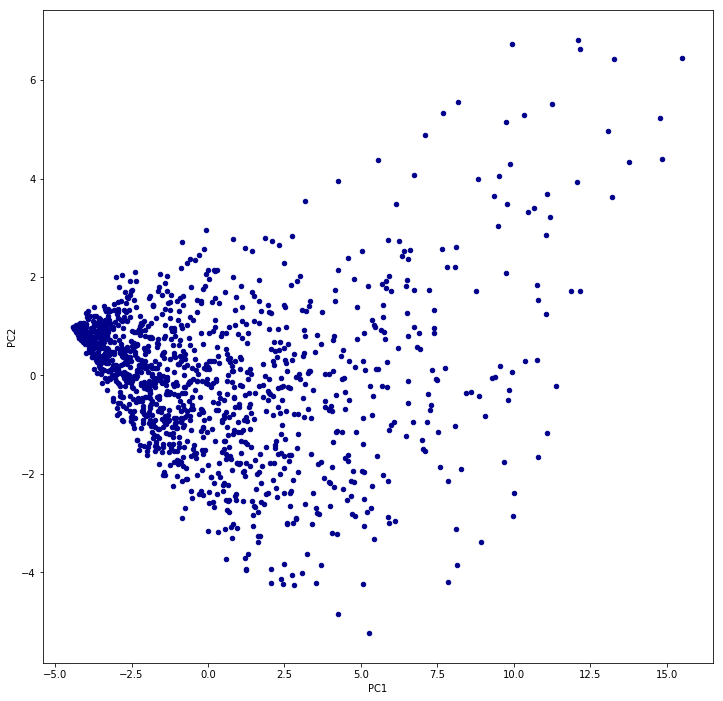

In [111]:
ax1 = df_pc_binMat_SE_Drug.plot.scatter(x='PC1', y='PC2', c='DarkBlue', figsize=(12,12))

In [113]:
outliers = df_pc_binMat_SE_Drug['PC2'] < -4

In [114]:
df_pc_binMat_SE_Drug[outliers]

Drug       PC1       PC2
11    5-aza-2'-deoxycytidine  3.535118 -4.225898
39                  Cancidas  4.250401 -4.849410
383               cladribine  2.748625 -4.056088
393              clofarabine  2.380482 -4.142987
493                docetaxel  5.055989 -4.232843
540                 eribulin  2.063739 -4.207482
563               everolimus  7.860656 -4.187476
985                pazopanib  3.082236 -4.021261
1041               ponatinib  2.799209 -4.261605
1166               sorafenib  2.455453 -4.232379
1188               sunitinib  5.277244 -5.233162

In [115]:
hist_binMat_SE = binMat_SE_sum.sum(axis=1)

In [116]:
hist_binMat_SE.sort_values()

Drug
mepyramine                    1
Prussian                      1
yttrium                       1
5-methyltetrahydrofolate      1
triclosan                     1
sulfonamide                   2
selenium                      2
DMSO                          2
retinol                       2
pertechnetate                 2
zinc                          3
HMDP                          3
paromomycin                   3
hexachlorophene               3
ZnCl2                         3
AC1O3HA7                      3
crotamiton                    3
eicosapentaenoic              3
monobenzone                   3
malathion                     4
acetate                       4
luliconazole                  4
fluoride                      4
sulconazole                   4
physostigmine                 5
pyridoxine                    5
Brolene                       5
ascorbate                     5
econazole                     5
biguanide                     5
                           ... 
pos

Text(0, 0.5, 'Frequency')

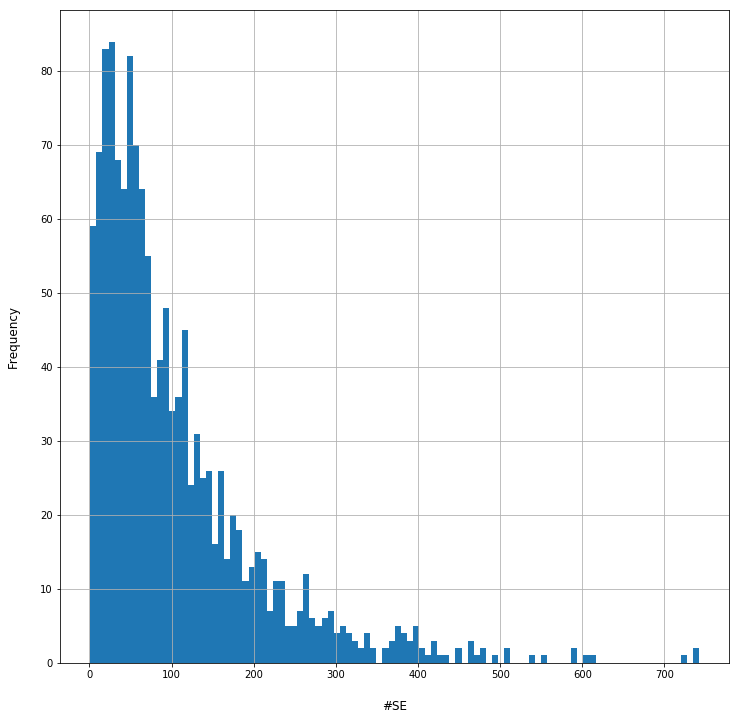

In [117]:
ax2 = hist_binMat_SE.hist(figsize=(12,12),bins=100)
ax2.set_xlabel("#SE", labelpad=20, size=12)
ax2.set_ylabel("Frequency", labelpad=20, size=12)